<a href="https://colab.research.google.com/github/adamfahmad/pemrograman-python/blob/main/pertemuan-11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [3]:
ls

'1101183489 Registrasi _ Telkom University (fix) (1).pdf'
'1101183489 Registrasi _ Telkom University (fix) (2).pdf'
'1101183489 Registrasi _ Telkom University (fix).pdf'
'126_form presensi RAS (1).gdoc'
'126_form presensi RAS (2).gdoc'
'126_form presensi RAS.gdoc'
 Classroom/
'Colab Notebooks'/
'file ksm.png'
'form kehadiran 2..png'
'form Kehadiran.png'
'Formulir tanpa judul.gform'
'Hasil Praktikum_TT-09_21_Adam Fauzan Ahmad_1101183489 (1).rar'
'Hasil Praktikum_TT-09_21_Adam Fauzan Ahmad_1101183489.rar'
'Jurnal 1.pdf'
'JURNAL_MODUL1_SISKOM-18031_1101183489_ADAM FAUZAN AHMAD.pdf'
'JURNAL_MODUL2_SISKOM-18031_1101183489_ADAM FAUZAN AHMAD 29-Sep-2020 19-24-28.pdf'
'JURNAL MODUL 2_TT-9_Adam Fauzan Ahmad_1101183489..pdf'
'JURNAL_MODUL3_SISKOM-18031_1101183489_ADAM FAUZAN AHMAD.pdf'
'Laporan KBMS ANNIVERSARY2020.gsheet'
'modul 1_21_Adam Fauzan Ahmad_1101183489.rar'
'MODUL3_21_1101183489_ADAM FAUZAN AHMAD.rar'
'pemrograman Python'/
'pertemuan 11'/
'running modul (1).png'
'running modul.png'
'S

In [4]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [5]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("pemrograman Python")
data = []
labels = []

[INFO] loading images...


In [6]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((64, 64))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [8]:
print(labels)

['GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03',

In [9]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [10]:
print(labels)

[[0 0 1]
 [0 0 1]
 [0 0 1]
 ...
 [0 1 0]
 [0 1 0]
 [0 1 0]]


In [11]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(255, 64, 64, 3)
(86, 64, 64, 3)


In [12]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (3,3), activation='relu', input_shape=(64,64,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(3, activation='softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 8)         224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3

In [13]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [14]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Epoch 1/25
8/8 [==============================] - 1s 80ms/step - loss: 1.2066 - accuracy: 0.2549 - val_loss: 1.1115 - val_accuracy: 0.3256
Epoch 2/25
8/8 [==============================] - 0s 48ms/step - loss: 1.0801 - accuracy: 0.4039 - val_loss: 1.0699 - val_accuracy: 0.4186
Epoch 3/25
8/8 [==============================] - 0s 61ms/step - loss: 1.0408 - accuracy: 0.4784 - val_loss: 1.0309 - val_accuracy: 0.5814
Epoch 4/25
8/8 [==============================] - 0s 62ms/step - loss: 0.9728 - accuracy: 0.6314 - val_loss: 0.9947 - val_accuracy: 0.4767
Epoch 5/25
8/8 [==============================] - 0s 57ms/step - loss: 0.8859 - accuracy: 0.6118 - val_loss: 0.9194 - val_accuracy: 0.6512
Epoch 6/25
8/8 [==============================] - 0s 62ms/step - loss: 0.7953 - accuracy: 0.7059 - val_loss: 0.8582 - val_accuracy: 0.6744
Epoch 7/25
8/8 [==============================] - 1s 63ms/step - loss: 0.7129 - accuracy: 0.7020 - val_loss: 0.8086 - val_accuracy: 0.6744
Epoch 8/25
8/8 [===========

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


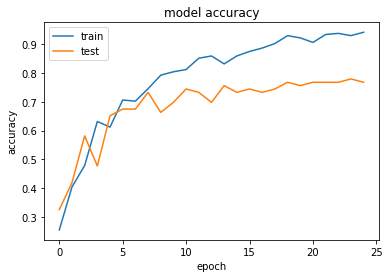

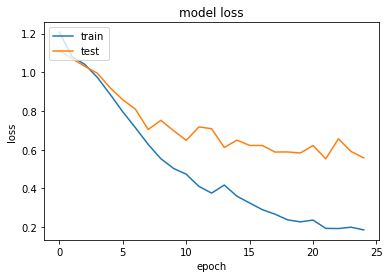

In [15]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.78      0.75      0.76        28
      GMB_02       0.69      0.73      0.71        30
      GMB_03       0.85      0.82      0.84        28

    accuracy                           0.77        86
   macro avg       0.77      0.77      0.77        86
weighted avg       0.77      0.77      0.77        86



In [17]:
model1.save('pertemuan 11')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: pertemuan 11/assets
